In [1]:
%matplotlib inline

# Motor imagery decoding from EEG data using the Common Spatial Pattern (CSP)

Authors: Martin Billinger, Modified by Annalisa Pascarella, Vanessa Hadid

Decoding of motor imagery applied to EEG data decomposed using CSP.
Here the classifier is applied to features extracted on CSP filtered signals.

See http://en.wikipedia.org/wiki/Common_spatial_pattern and [1]

The EEGBCI dataset is documented in [2]
The data set is available at PhysioNet [3]

[1] Zoltan J. Koles. The quantitative extraction and topographic mapping
    of the abnormal components in the clinical EEG. Electroencephalography
    and Clinical Neurophysiology, 79(6):440--447, December 1991.

[2] Schalk, G., McFarland, D.J., Hinterberger, T., Birbaumer, N.,
    Wolpaw, J.R. (2004) BCI2000: A General-Purpose Brain-Computer Interface
    (BCI) System. IEEE TBME 51(6):1034-1043

[3] Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG,
    Mietus JE, Moody GB, Peng C-K, Stanley HE. (2000) PhysioBank,
    PhysioToolkit, and PhysioNet: Components of a New Research Resource for
    Complex Physiologic Signals. Circulation 101(23):e215-e220



Import MNE for EEG data processing and analysis, along with NumPy for numerical operations and Matplotlib for plotting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP



Load EEG data from the EEGBCI project for specific runs and subjects, which involves motor imagery tasks.

In [3]:
# Set parameters and read data
tmin, tmax = -1., 4.
subject = 1
runs = [6, 10, 14]

raw_fnames = eegbci.load_data(subject, runs)
raw_fnames


[PosixPath('/home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf'),
 PosixPath('/home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf'),
 PosixPath('/home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf')]

In [4]:
raw_files = [read_raw_edf(f, preload=True) for f in raw_fnames]
raw = concatenate_raws(raw_files)

Extracting EDF parameters from /home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/hyruuk/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [5]:
# Set channel locations to plot topographies with the montage
from mne.channels import make_standard_montage
raw.rename_channels(lambda x: x.strip('.'))
montage = make_standard_montage('standard_1005')
raw.set_montage(montage, False)

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MiB, data loaded>

In [6]:
raw

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MiB, data loaded>

In [7]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>

In [8]:
raw.annotations

<Annotations | 94 segments: BAD boundary (2), EDGE boundary (2), T0 (45), ...>

In [9]:
raw.annotations.description

array(['T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0',
       'T2', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2',
       'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'BAD boundary',
       'EDGE boundary', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0', 'T1',
       'T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0',
       'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2',
       'BAD boundary', 'EDGE boundary', 'T0', 'T2', 'T0', 'T1', 'T0',
       'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2',
       'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0',
       'T1', 'T0', 'T2'], dtype='<U13')

In [10]:
%matplotlib qt
fig = raw.plot()

Using matplotlib as 2D backend.


In [11]:
%matplotlib inline
# strip channel names of "." characters
raw.rename_channels(lambda x: x.strip('.'))

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MiB, data loaded>

In [12]:
raw.ch_names

['Fc5',
 'Fc3',
 'Fc1',
 'Fcz',
 'Fc2',
 'Fc4',
 'Fc6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'Cp5',
 'Cp3',
 'Cp1',
 'Cpz',
 'Cp2',
 'Cp4',
 'Cp6',
 'Fp1',
 'Fpz',
 'Fp2',
 'Af7',
 'Af3',
 'Afz',
 'Af4',
 'Af8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'Ft7',
 'Ft8',
 'T7',
 'T8',
 'T9',
 'T10',
 'Tp7',
 'Tp8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'Po7',
 'Po3',
 'Poz',
 'Po4',
 'Po8',
 'O1',
 'Oz',
 'O2',
 'Iz']

Band-pass filtering is crucial to isolate the frequency bands relevant to motor tasks, typically within the 7-30 Hz range.
Events related to motor imagery (e.g., imagining moving hands vs. feet) are extracted here. This step is critical for defining the time windows for epoch extraction. Apply a band-pass filter to the raw data to focus on frequencies between 7 and 30 Hz, which are relevant for analyzing motor tasks.
Extract events from the annotations within the raw data, which denote different motor imagery tasks such as imagining moving hands vs. feet.


In [13]:
# Apply band-pass filter
raw.filter(7., 30., method='iir')

# events = find_events(raw, shortest_event=0, stim_channel='STI 014', verbose=True)
events, _ = mne.events_from_annotations(raw)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]


In [14]:
events[:10]

array([[   0,    0,    1],
       [ 672,    0,    3],
       [1328,    0,    1],
       [2000,    0,    2],
       [2656,    0,    1],
       [3328,    0,    2],
       [3984,    0,    1],
       [4656,    0,    3],
       [5312,    0,    1],
       [5984,    0,    2]])

Events related to motor imagery (e.g., imagining moving hands vs. feet) are extracted here. This step is critical for defining the time windows for epoch extraction.
Extract events from the annotations within the raw data, which denote different motor imagery tasks such as imagining moving hands vs. feet.

In [15]:
event_id = dict(hands=2, feet=3)

picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

# Read epochs (train will be done only between 1 and 2s)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)
epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
labels = epochs.events[:, -1] - 2


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 801 original time points ...
0 bad epochs dropped


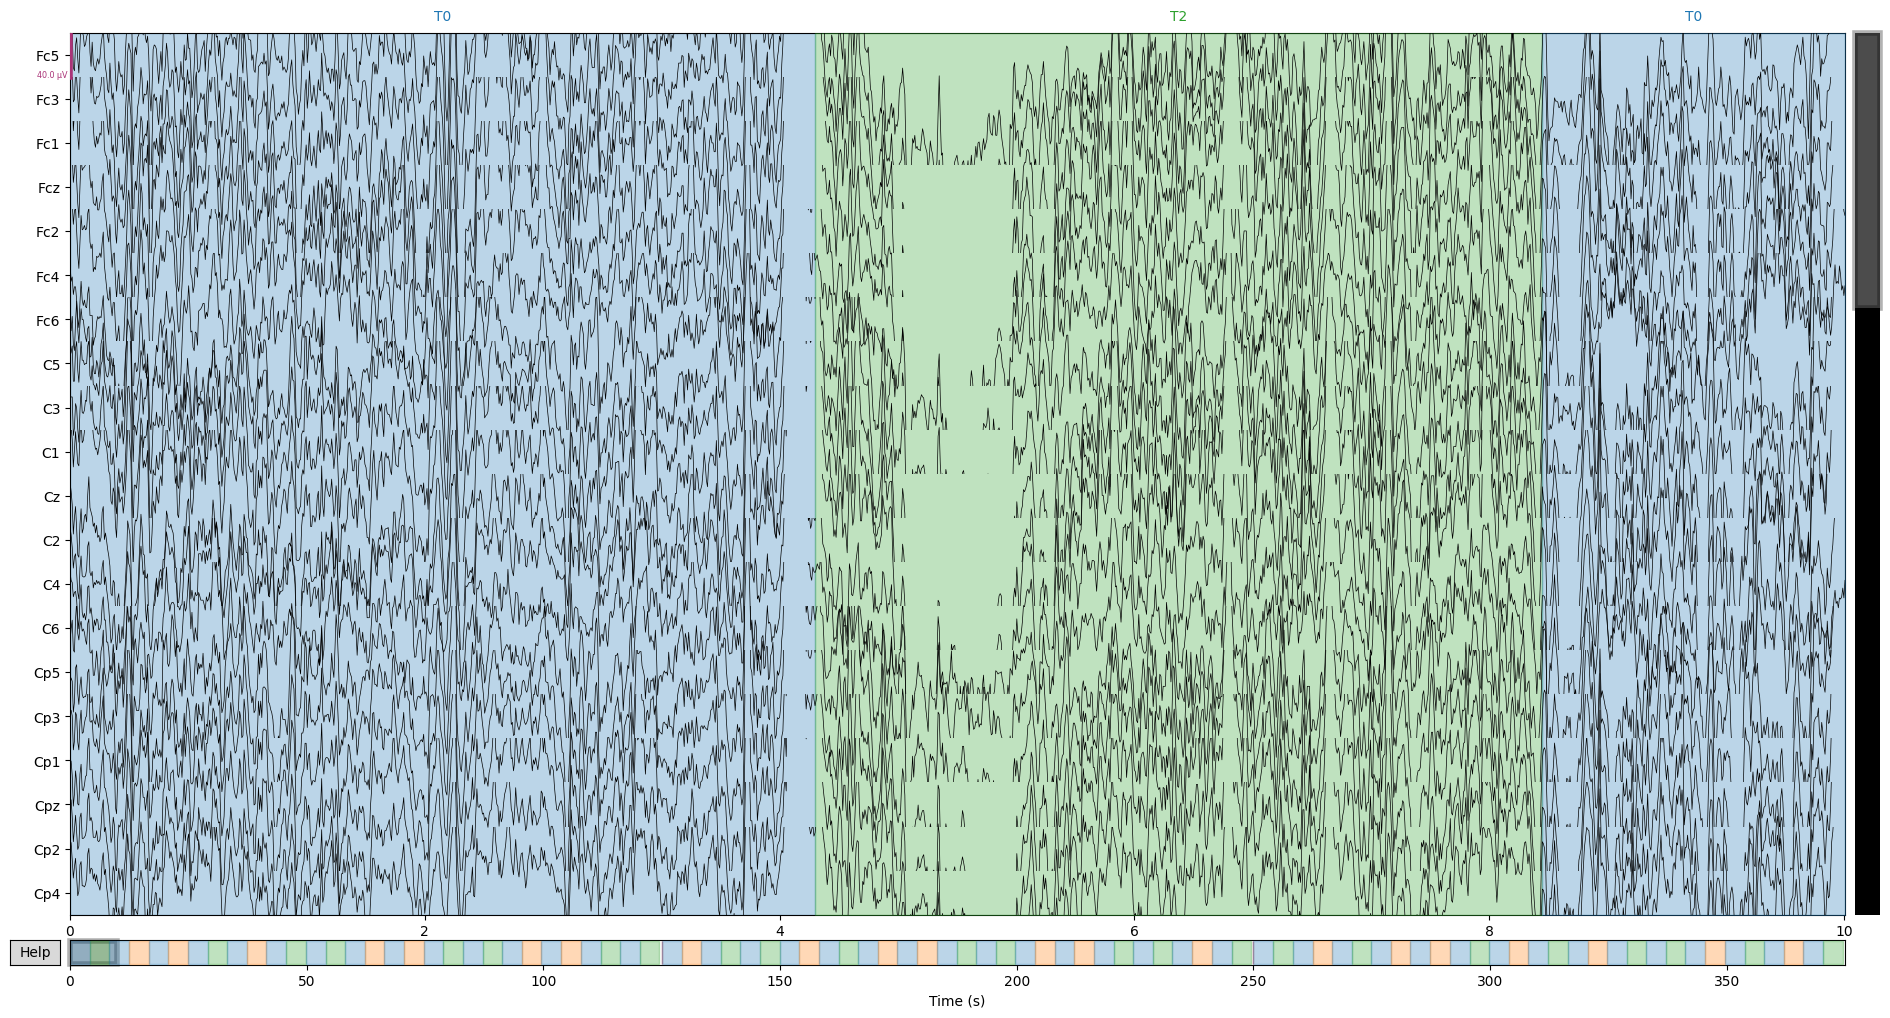

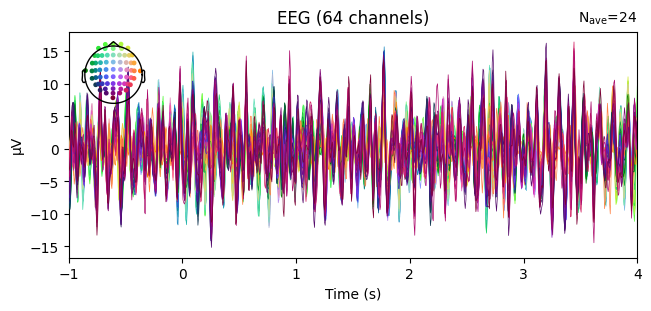

Channels marked as bad:
none


In [16]:
fig = epochs['feet'].average().plot();


### Classifiers

**Linear discrimant analysis (LDA)** is used to distinguish between different motor imagery tasks using the features extracted by CSP. LDA works well when the data is approximately normally distributed and the classes are linearly separable.

**Logistic Regression**: This model could also be employed as it provides probabilistic outputs and is effective  in binary classification problems. Logistic regression is particularly useful if you are interested in measuring the uncertainty of predictions or if the classes are not perfectly linearly separable.

**Support Vector Machine (SVM)**: SVM can be another excellent choice, especially with non-linear kernels (like RBF), when the decision boundaries between classes are not linear. SVMs are known for their effectiveness in high-dimensional spaces, such as those often encountered in EEG data analysis.

**Random Forest**: This ensemble method, which operates by building multiple decision trees and voting on the most  popular output class, is robust to overfitting and can handle various types of data including non-linear relationships. Random Forests can also provide insights into feature importance, which can be valuable for interpreting the features extracted by CSP.

Each of these classifiers can be integrated with CSP features to potentially improve classification accuracy and robustness, depending on the specific characteristics of the EEG data and the task requirements.

### CSP parameters
  
**n_components**: int, optional (default=4)
The number of components to use for CSP. This parameter determines the number of spatial filters to construct. 
Each component will correspond to a pattern which maximizes the variance for one class while minimizing it for the other.
Essentially, fewer components focus on the most discriminative spatial patterns, while more components can capture more complex patterns but may include noise.

**reg**: None | float | str, optional (default=None)
This parameter is used to regularize the covariance matrices of the signal.
Regularization can help improve the stability and generalization of the CSP patterns, especially when the number of samples is small.
If set to None, no regularization is applied. You can also specify a float value as the shrinkage coefficient directly or use a string to specify a method of automatic shrinkage selection such as 'ledoit_wolf' (Ledoit-Wolf estimator) or 'oas' (Oracle Approximating Shrinkage).

**log**: bool, optional (default=True)
Specifies whether to apply log transformation to the variances obtained by the CSP. 
Applying log transformation typically improves the classification by normalizing the distribution and making the features more Gaussian-like. 
This is generally useful because many classifiers, especially linear models, assume that the input data is normally distributed.


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True)


In [18]:
epochs.get_data().shape

(45, 64, 801)

Setting up cross-validation to ensure the model generalizes well to new data. 
This involves creating multiple training and testing splits to validate the stability and accuracy of the classifier.
Additionally, other cross-validation techniques such as KFold or StratifiedKFold can be used depending on the dataset characteristics and the specific requirements of the study.

The seed of the pseudo random number generator to use when shuffling the data. 
If int, random_state is the seed used by the random number generator; 
If RandomState instance, random_state is the random number generator; 
If None, the random number generator is the RandomState instance used by `np.random`.
Specifying a fixed `random_state` ensures that the splits you generate are reproducible. 
Changing this value will result in different shuffles, which can alter the cross-validation results. 
This parameter is especially important in scenarios where exact reproducibility is required for debugging or comparative model evaluations.

In [19]:
# Define a monte-carlo cross-validation generator (reduce variance):
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
scores = []
X = epochs.get_data()
X_train = epochs_train.get_data()

In [20]:
# Use scikit-learn Pipeline with cross_val_score function
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
clf = Pipeline([('CSP', csp), ('LDA', lda)])


In [21]:
clf

Pipeline(steps=[('CSP', CSP(log=True)), ('LDA', LinearDiscriminantAnalysis())])

### Metrics for Evaluating Classifier Performance

The default scoring metric for `cross_val_score` is the classifier’s accuracy, which measures the proportion of correctly predicted instances. However, other metrics can also be specified using the `scoring` parameter:

- 'accuracy': Measures the proportion of correctly predicted instances.
- 'precision': Measures the accuracy of positive predictions.
- 'recall': Measures the ability of the classifier to find all the positive samples.
- 'f1': A weighted average of precision and recall.
- 'roc_auc': Area under the ROC curve, useful for evaluating the performance across all possible classification thresholds.

These metrics can provide a more nuanced view of the classifier's performance, particularly in datasets where class imbalance might affect the accuracy score.

In [22]:
scores = cross_val_score(clf, X_train, labels, cv=cv, n_jobs=1)
print(scores)

Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMP

### Class Imbalance
`class_balance` calculates the proportion of the most frequent class in the dataset. 
This value is used to gauge the chance level of classification accuracy, which helps in evaluating whether the classifier is performing meaningfully better than just guessing the most frequent class.
- If `labels == labels[0]` returns True, it counts how often the first label occurs compared to others.
- The calculation of `max(class_balance, 1. - class_balance)` ensures that the balance score reflects the majority class, providing a baseline accuracy that a naive classifier would achieve by always predicting the majority class. If the classes are perfectly balanced, this value would be 0.5.

*See Thölke et al.2023, Neuroimage.*

### CSP Pattern Visualization
After fitting the CSP, the `plot_patterns` function visualizes the spatial filters that have been learned.
These filters highlight the regions of the brain that contribute most to distinguishing between the classes based on the EEG signals. The patterns are plotted with labels corresponding to their channel type ('eeg'),and the units are arbitrary units (AU), with the size parameter controlling the scale of the plot. Visualizing these patterns can help in understanding which areas of the brain are most active in differentiating between the tasks being classified (e.g., imagining moving hands vs. feet).

Classification accuracy: 0.944444 / Chance level: 0.533333
Computing rank from data with rank=None
    Using tolerance 0.00033 (2.2e-16 eps * 64 dim * 2.3e+10  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.


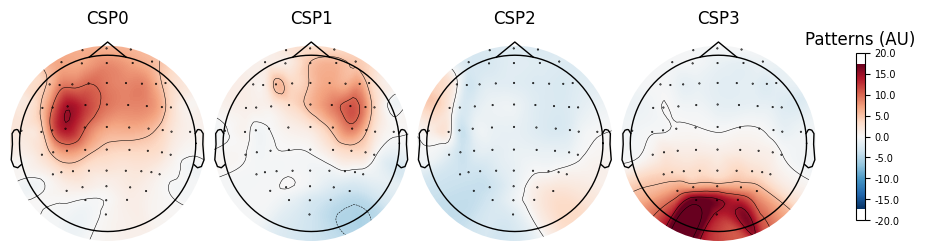

In [23]:
# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(X, labels)

fig = csp.plot_patterns(epochs.info, ch_type='eeg',
                  units='Patterns (AU)', size=1.5);

## Look at performance over time

### Sliding Window Analysis in EEG Data

In this section, we implement a sliding window analysis to evaluate how classification accuracy evolves over time, providing insights into the dynamic changes in brain activity during motor imagery tasks. This technique is essential for understanding temporal aspects of the EEG data, particularly in tasks where brain activity patterns change rapidly.

### What is a Sliding Window Analysis?

A sliding window analysis involves moving a small "window" across the data to analyze it in chunks over time. This method allows us to assess the classifier's performance continuously as opposed to a static overall measurement. It is particularly useful for EEG data where the state of the brain can change significantly in a short period.

### Parameter Explanation:
- **Sampling Frequency (`sfreq`)**: This indicates the number of data samples recorded per second, which determines the temporal granularity of our analysis.
- **Window Length (`w_length`)**: This is the duration of each window, set to 0.5 seconds in this study. This length is chosen to ensure each window captures enough data to provide reliable insights while maintaining the ability to detect rapid changes.
- **Window Step (`w_step`)**: This defines the increment by which the window moves across the data. A smaller step size of 0.1 seconds allows for a more detailed and granular analysis, giving us a finer understanding of when changes occur.
- **Window Start Points (`w_start`)**: These are the initial points for each window throughout the data, calculated to ensure comprehensive coverage without overlapping beyond the data's duration.

### Why Use Sliding Windows?
Sliding windows are advantageous for studying EEG data because they allow researchers to:
- **Track Changes Over Time**: By analyzing the data in consecutive segments, researchers can observe how the patterns of brain activity evolve.
- **Capture Dynamic Brain Activity**: Motor imagery tasks can induce quick shifts in neural activity. Sliding windows help in capturing these changes that might be missed in a static or overall analysis.
- **Enhance Statistical Power**: Analyzing multiple small segments can sometimes offer more nuanced insights into the data, increasing the reliability of the results.

The results from this method will provide a time-resolved plot of classification accuracy, illustrating how well the classifier can distinguish between different motor imagery tasks at various points during the EEG session.
he EEG session.


Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 9.1e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 64 dim * 8.9e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (data): 64
    data: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating class=0 covariance using EMP

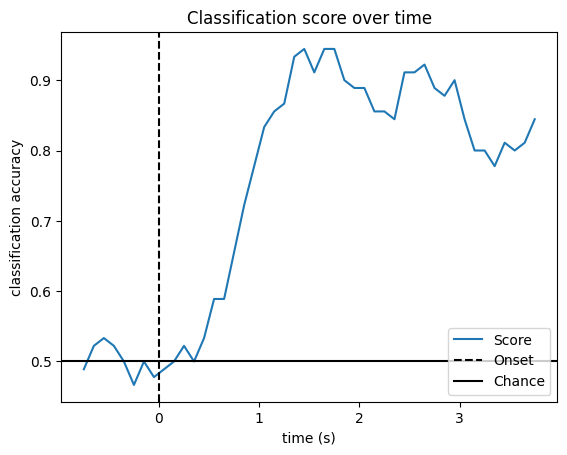

In [24]:
sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, X.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv.split(X, labels):
    y_train, y_test = labels[train_idx], labels[test_idx]

    XX_train = csp.fit_transform(X_train[train_idx], y_train)
    XX_test = csp.transform(X_train[test_idx])

    # fit classifier
    lda.fit(XX_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        XX_test = csp.transform(X[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(XX_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
fig = plt.show()

## Exercises
The following exercises are designed to enhance understanding and hands-on experience with EEG data analysis using CSP:

- **CSP Parameter Exploration:** Explore how different CSP parameters (n_components, reg, log) affect the model's performance. Adjust these parameters and visualize their impact on classification accuracy.
- **Classifier Comparison:** Investigate the use of different classifiers. Replace LDA with a Random Forest classifier and compare the classification performance. Adjust data preprocessing if necessary.
- **Cross-Validation Strategies:** Investigate different cross-validation strategies and scoring methods to understand their influence on model stability and accuracy. Try using KFold and StratifiedKFold.
- **Further Reading:** For more information on CSP and its applications in EEG analysis, see [MNE's CSP documentation](https://mne.tools/stable/generated/mne.decoding.CSP.html#mne.decoding.CSP).